# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [ ]:
import sys
import os

# Verify we're running in Colab - exit if not
try:
    import google.colab
except ImportError:
    raise RuntimeError("This script is designed to run only in Google Colab")

# Define repo details
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

# Clone or update the repository
if not os.path.exists(repo_path):
    !git clone {repo_url} {repo_path}
else:
    %cd {repo_path}
    !git stash  # Stash any local changes
    !git pull

# Add src/ to Python path
sys.path.append(f"{repo_path}/src")

# Import the scraper function (replace with actual import)
# from scraper_module import scrape_function
!pip install -r requirements.txt
!pip install PyMuPDF


/content/Scrapify
No local changes to save
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (12/12), 42.15 KiB | 526.00 KiB/s, done.
From https://github.com/YonaniCodes/Scrapify
   7b48c42..6ebd7ee  main       -> origin/main
Updating 7b48c42..6ebd7ee
Fast-forward
 notebooks/scrapify_demo.ipynb | 1290 +++++++++++++++++++++++++++++++++++++++--
 1 file changed, 1256 insertions(+), 34 deletions(-)
  Using cached asgiref-3.8.1-py3-none-any.whl.metadata (9.3 kB)
  Using cached asttokens-2.4.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3

In [ ]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

Everything is ready you can start working 🎉🎉🎉🎉


In [ ]:
import sys
sys.path.append('/content/Scrapify/src')

In [ ]:
from scrapify import scrape
from scrapify import get_report
from preprocessing import normalize_amharic

import pandas as pd

## Steps to Scrape a website

1. Install the  `googlesearch-python` module
2. Define a function that takes two arguments `num_urls` and `search_query`. and return list of urls
3. call the `scrape` method by passing list of `urls` and `your_name` as a second paramete (optional).

In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search

def get_links_from_simple_search(query, num_results):
    """
    Retrieves URLs from a simple Google search.

    Args:
        query (str): The search query.
        num_results (int): The desired number of search results. This is not directly supported by googlesearch,
                          so it will be used to limit the results after fetching.

    Returns:
        list: A list of URLs.
    """
    # Fetch the search results
    search_results = search(query, num_results=num_results)
    # Convert the generator object to a list
    urls = list(set(search_results))
    return urls

We need a function to filter if the url is already scraped we dont wanna send reques to our backend everyurl that is returned by the function `get_links_from_simple_search`

In [ ]:
def filter_url(urls):
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
  scraped,unscrape=get_report()
  scraped_data= pd.DataFrame(scraped)
  unscraped_data= pd.DataFrame(unscrape)
  filtered_urls = []
  for url in urls:
      # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
      if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
          filtered_urls.append(url)
  return filtered_urls

# **Lets visualize our scraping status**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scraping_report():
    """
    Generate a pie chart showing the ratio of scraped to unscraped URLs.
    Uses get_report() internally to fetch the data.
    """
    # Get the data
    scraped, unscraped = get_report()

    # Convert to DataFrames
    scraped_data = pd.DataFrame(scraped)
    unscraped_data = pd.DataFrame(unscraped)

    # Calculate counts
    scraped_count = len(scraped_data['url'])
    unscraped_count = len(unscraped_data['url'])

    # Prepare data for visualization
    labels = ['Scraped URLs', 'Unscraped URLs']
    sizes = [scraped_count, unscraped_count]
    colors = ['salmon', 'lightblue']  # Green and red

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes,
           labels=labels,
           colors=colors,
           autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(sizes))})',
           startangle=90,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
           textprops={'fontsize': 12})

    ax.set_title('Scraping Report: Scraped vs Unscraped URLs', pad=20, fontsize=14)
    plt.tight_layout()




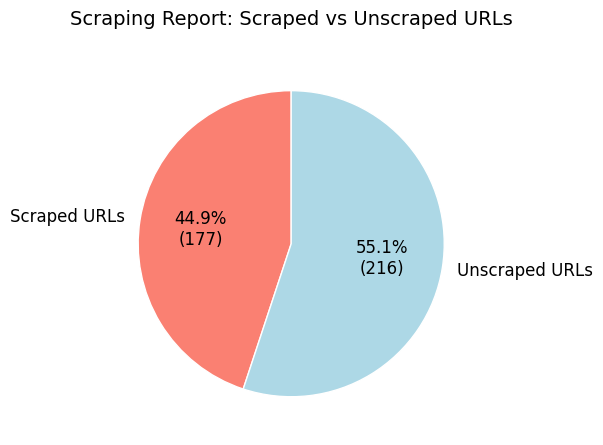

In [ ]:
# Example usage:
plot_scraping_report()

### Normalizing our data


In order to normalize our well define
1. deffine a function `read_jsonl_content` to read jsoln file
2. normalize the text returned using `normalize_and_save_data`
3. Finall define the wraper function `normalize_jsonl_file`



In [8]:
import json

def read_jsonl_content(file_path, content_key='content'):
    """Returns a list of 'content' values from a .jsonl file."""
    content_values = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            stripped_line = line.strip()
            if stripped_line:
                record = json.loads(stripped_line)
                content_values.append(record[content_key])

    print(f"Read {len(content_values)} records from {file_path}.")
    return content_values  # Example: ["text1", "text2", ...]

In [9]:
def normalize_and_save_data(jsonl_data, file_path):
    """Writes all JSONL entries as one continuous text blob."""
    with open(file_path, 'w', encoding='utf-8') as f:
        all_text = " ".join(normalize_amharic(text) for text in jsonl_data)  # No newlines
        f.write(all_text)

In [10]:
def normalize_jsonl_file(input_file, output_file):
  jsonl_data=read_jsonl_content(test_file_path)
  normalize_and_save_data(jsonl_data, destination_file_path)

How to normalize data?

1. define `test_file_path` the jsonl file is found.
2. define `destination` you want to store the normaliez text file
3. call the function `normalize_and_save_data  ` with the two parameters
4. finnally call the wraper function

In [11]:
test_file_path = 'extracted_data.jsonl'
destination_file_path = 'normalized.txt'

normalize_jsonl_file(test_file_path, destination_file_path)


JSONDecodeError: Unterminated string starting at: line 1 column 312 (char 311)

### Chunking the data. now is the time to chunk all the data.

In [12]:
import os
import os
import re
import shutil
from google.colab import files

def read_normalized_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()


def chunk_text(text, max_sentences=100, overlap_sentences=10):
    """
    Splits the input text into chunks based on number of sentences.

    Args:
        text: Full text string.
        max_sentences: Maximum number of sentences per chunk.
        overlap_sentences: Number of overlapping sentences between chunks.

    Returns:
        List of sentence-based text chunks.
    """
    # Basic sentence splitting using punctuation (handles Amharic + general)
    sentences = re.split(r'(?<=[።!?])\s+', text.strip())
    chunks = []
    i = 0

    while i < len(sentences):
        chunk = sentences[i:i + max_sentences]
        chunks.append(" ".join(chunk))
        i += max_sentences - overlap_sentences

    return chunks


def save_chunks_as_files(chunks: list[str], output_dir: str, base_filename: str = "chunk"):
    """
    Saves each text chunk as an individual .txt file.

    Args:
        chunks: List of text chunks (strings)
        output_dir: Directory to save the files
        base_filename: Prefix for filenames (default: "chunk")

    Returns:
        List of paths to the created files
    """
    os.makedirs(output_dir, exist_ok=True)
    saved_paths = []

    for i, chunk in enumerate(chunks, start=1):
        file_path = os.path.join(output_dir, f"{base_filename}_{i}.txt")
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(chunk)
        saved_paths.append(file_path)

    print(f"Saved {len(saved_paths)} files:")
    for path in saved_paths[:10]:
        print(f"→ {path}")

def zip_chunks_folder(folder_path):
    zip_file_path = f"{folder_path}.zip"
    shutil.make_archive(folder_path, 'zip', folder_path)
    return zip_file_path



In [13]:
import datetime
normalized_file_path = 'normalized.txt'
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
destination_file_path = f'chunks{timestamp}'
text=read_normalized_text(normalized_file_path)
chunks=chunk_text(text)
save_chunks_as_files(chunks,destination_file_path)





FileNotFoundError: [Errno 2] No such file or directory: 'normalized.txt'

## Downloading the chunks

In [3]:
zip_file_path = zip_chunks_folder(destination_file_path)
files.download(zip_file_path)

print(f"Chunks folder zipped and ready for download: {zip_file_path}")


NameError: name 'destination_file_path' is not defined